<a href="https://colab.research.google.com/github/mw1849/nyu-python-public-policy/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**STEP 1: Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.**

In [0]:
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='count_of_311_requests')
print(top_10)

                        complaint_type  count_of_311_requests
0                  Noise - Residential                 236350
1                       HEAT/HOT WATER                 205985
2                      Illegal Parking                 195159
3  Request Large Bulky Item Collection                 177175
4                     Blocked Driveway                 145446
5              Noise - Street/Sidewalk                  95977
6                     Street Condition                  93341
7                 UNSANITARY CONDITION                  81713
8                         Water System                  70509
9                                Noise                  59007


**STEP 2: Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.**

In [0]:
filtered_311 = df[df.complaint_type.isin(top_10.complaint_type)]

In [0]:
#test to see if filtering worked
filtered_311.groupby('complaint_type').size()

complaint_type
Blocked Driveway                       145446
HEAT/HOT WATER                         205985
Illegal Parking                        195159
Noise                                   59007
Noise - Residential                    236350
Noise - Street/Sidewalk                 95977
Request Large Bulky Item Collection    177175
Street Condition                        93341
UNSANITARY CONDITION                    81713
Water System                            70509
dtype: int64

**Step 3. Convert the created_date column in filtered_311 to be a datetime series.**

In [0]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
# check data types and confirm they are now datetime

filtered_311.dtypes

Unnamed: 0                                 int64
Unnamed: 0.1                               int64
unique_key                                 int64
created_date                      datetime64[ns]
closed_date                               object
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                             object
incident_zip                              object
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
address_type                              object
city                                      object
landmark                                  object
facility_type       

**Step 4. Create 6 new columns in filtered_311 that extract each of the following from created_date**

In [0]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
#check to see if code worked and columns formed
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0


**Step 5. Trends by hour**



In [0]:
count_per_hour_date = filtered_311.groupby(['hour', 'date', 'complaint_type']).size().reset_index(name='count_requests')

In [0]:
count_per_hour_date.tail()

,hour,date,complaint_type,count_requests
85074,23,2019-08-23,Noise,10
85075,23,2019-08-23,Noise - Residential,142
85076,23,2019-08-23,Noise - Street/Sidewalk,98
85077,23,2019-08-23,Street Condition,4
85078,23,2019-08-23,Water System,12


In [0]:
median_count_hour = count_per_hour_date.groupby(['hour','complaint_type'])['count_requests'].median().reset_index(name='median_requests')

In [0]:
median_count_hour.tail()

,hour,complaint_type,median_requests
235,23,Noise - Street/Sidewalk,17.0
236,23,Request Large Bulky Item Collection,10.0
237,23,Street Condition,4.0
238,23,UNSANITARY CONDITION,4.0
239,23,Water System,3.0


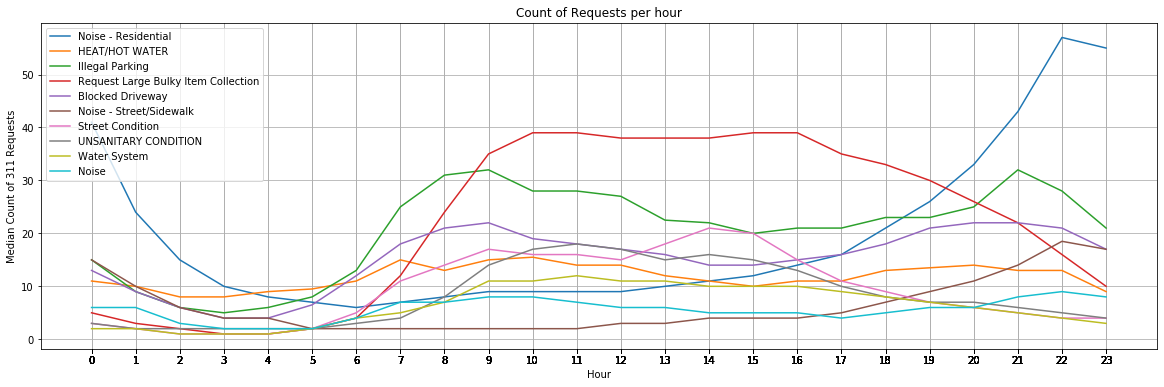

In [0]:
plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  complaint_type1 = median_count_hour[median_count_hour.complaint_type==x]
  plt.plot(complaint_type1.hour, complaint_type1.median_requests, label = x)

plt.xticks(median_count_hour.hour)
plt.grid()
plt.title('Count of Requests per hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

**Step 6. Trends by day of week** 

In [0]:
count_per_weekday = filtered_311.groupby(['weekday', 'date', 'complaint_type']).size().reset_index(name='count_requests')

In [0]:
count_per_weekday.tail()

,weekday,date,complaint_type,count_requests
3815,6,2019-08-18,Noise - Residential,993
3816,6,2019-08-18,Noise - Street/Sidewalk,597
3817,6,2019-08-18,Street Condition,139
3818,6,2019-08-18,UNSANITARY CONDITION,46
3819,6,2019-08-18,Water System,176


In [0]:
median_count_weekday = count_per_weekday.groupby(['weekday','complaint_type'])['count_requests'].median().reset_index(name='median_requests')

In [0]:
median_count_weekday.tail()

,weekday,complaint_type,median_requests
65,6,Noise - Street/Sidewalk,238.0
66,6,Request Large Bulky Item Collection,447.0
67,6,Street Condition,147.0
68,6,UNSANITARY CONDITION,116.0
69,6,Water System,96.0


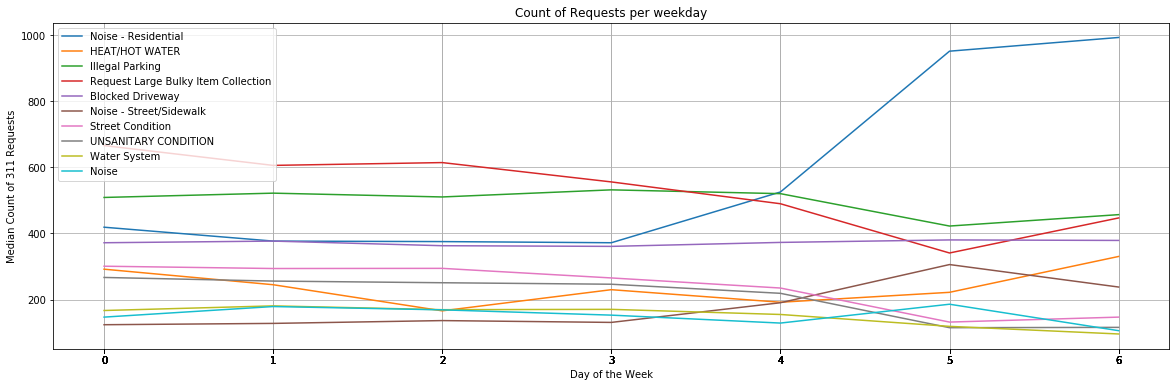

In [0]:
plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  complaint_type1 = median_count_weekday[median_count_weekday.complaint_type==x]
  plt.plot(complaint_type1.weekday, complaint_type1.median_requests, label = x)

plt.xticks(median_count_weekday.weekday)
plt.grid()
plt.title('Count of Requests per weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc=2)

**STEP 7: Trends by month**

In [0]:
count_per_month = filtered_311.groupby(['month', 'year', 'complaint_type']).size().reset_index(name='count_requests')

In [0]:
count_per_month.tail()

,month,year,complaint_type,count_requests
123,12,2018,Noise - Street/Sidewalk,2344
124,12,2018,Request Large Bulky Item Collection,13956
125,12,2018,Street Condition,6214
126,12,2018,UNSANITARY CONDITION,6338
127,12,2018,Water System,5283


In [0]:
median_count_month = count_per_month.groupby(['month','complaint_type'])['count_requests'].median().reset_index(name='median_requests')

In [0]:
median_count_month.tail()

,month,complaint_type,median_requests
114,12,Noise - Street/Sidewalk,2344.0
115,12,Request Large Bulky Item Collection,13956.0
116,12,Street Condition,6214.0
117,12,UNSANITARY CONDITION,6338.0
118,12,Water System,5283.0


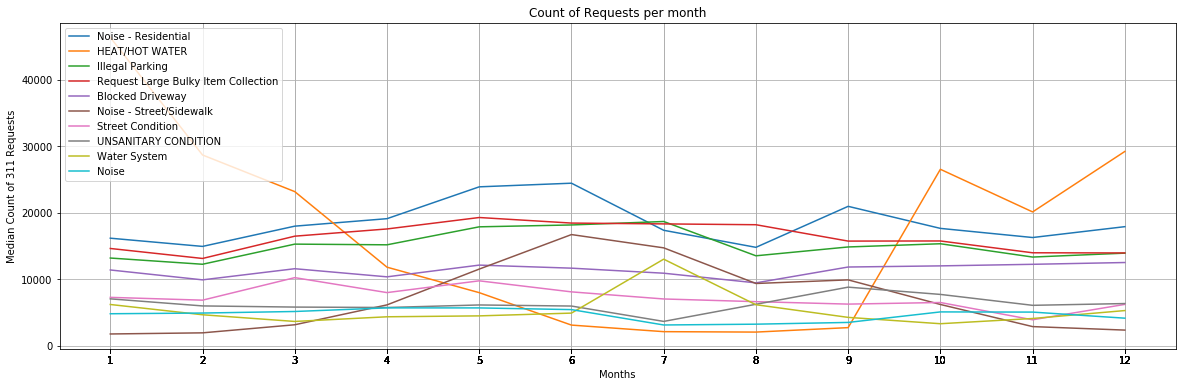

In [0]:
plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  complaint_type1 = median_count_month[median_count_month.complaint_type==x]
  plt.plot(complaint_type1.month, complaint_type1.median_requests, label = x)

plt.xticks(median_count_month.month)
plt.grid()
plt.title('Count of Requests per month')
plt.xlabel('Months')
plt.ylabel('Median Count of 311 Requests')
plt.legend(loc=2)

STEP 8: 
From our graph depicting the median count of 311 requests per hour and date for each complaint type, it seems that in general, for the top 10 complaint types, complaints seem to start rising at 7 AM, followed by a steady rise or plateau until 10 PM or so at night. Noise-residential complaints generally follow this trend, but it is interesting because there is actually a spike around 6-7 PM when people come home, where you see a rapid increase of complaints.

From our graph depicting the median count of 311 requests per weekday and date, we see that generally, for the top 10 complaint type requests, starting on Monday, the requests decrease by the time it reaches Sunday (though there are fluctuations throughout the week depending on the complaint type). The only exception to this rule is again, the Noise-resedential complaints, which spike up sharply on Fridays.

From our graph depicting the median count of 311 requests per month and year for each complaint type, the general trend seems to be that the median count increases, then decreases toward the end of the year. The only exception is HEAT/HOT WATER complaints, which are at a high in the beginning of the year (January), decreases drastically as we get into the Spring and Summer months, and then begins rising sharply at the onset of Fall (September), which makes sense.